/tmp/ipython-input-1532553180.py:296: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


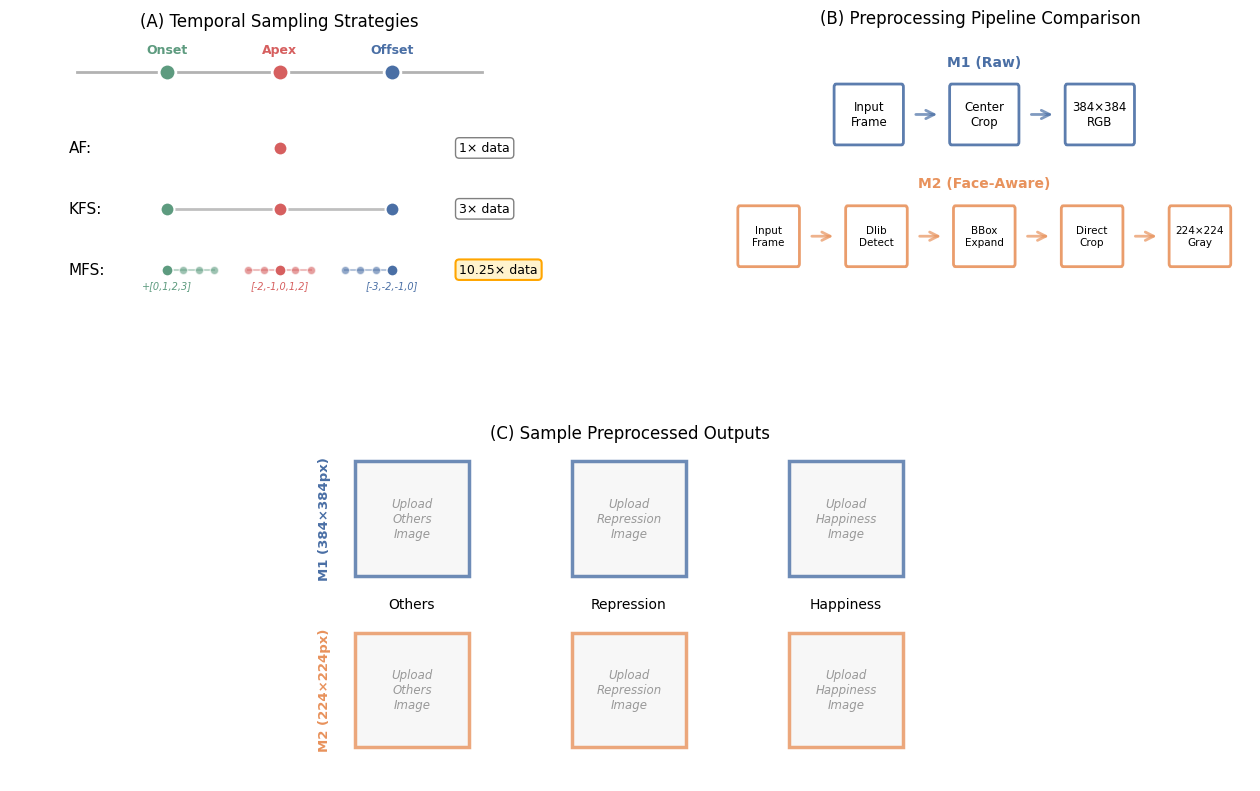


Figure saved as 'fig1_experimental_framework.png'
Click below to download:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


TO ADD YOUR OWN IMAGES:
1. Prepare 6 images (3 emotions × 2 methods)
2. Uncomment and run the image loading section below
3. Upload images when prompted


'\n# Upload images\nprint("\nUpload 6 images in this order:")\nemotions_list = [\'anger\', \'happiness\', \'surprise\']\nfor method in [\'M1\', \'M2\']:\n    for emotion in emotions_list:\n        print(f"  - {method}_{emotion}.jpg")\n\nuploaded = files.upload()\n\n# Process and integrate images\n# (Add image processing code here if needed)\n'

In [ ]:
# @title Experimental Framework Visualization

"""
CUSTOMIZATION GUIDE:
====================

PANEL A - Temporal Sampling:
  - label_x: Position of "AF:", "KFS:", "MFS:" labels (line ~52)
  - data_info_x: Position of data info boxes "1× data", etc. (line ~53)
  - onset_x, apex_x, offset_x: Timeline marker positions (lines ~43-45)

PANEL B - Pipeline Diagram:
  - box_width: Width of stage boxes (line ~105)
  - box_height: Height of stage boxes (line ~106)
  - arrow_gap: Gap between box and arrow (line ~107)
  - m1_stage_spacing: Distance between M1 stage centers (line ~111)
  - m1_start_x: Starting position for M1 pipeline (line ~112)
  - m2_stage_spacing: Distance between M2 stage centers (line ~132)
  - m2_start_x: Starting position for M2 pipeline (line ~133)
  - m2_box_width: Width of M2 boxes (line ~134)

PANEL C - Image Grid:
  - cell_size: Size of square placeholder boxes (line ~175)
  - col_spacing: Horizontal gap between columns (line ~176)
  - row_spacing: Vertical gap between rows (line ~177)
  - start_x: Starting X position (horizontal centering) (line ~178)
  - start_y: Starting Y position (line ~179)
  - label_offset: Distance from box to M1/M2 label (line ~180)
  - title_y: Y position of title (line ~171)
"""

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Rectangle, Circle
import numpy as np
from google.colab import files
from PIL import Image
import io

# Professional soft colors
color_onset = '#5D9B7F'    # Green for onset
color_apex = '#D65F5F'     # Red for apex
color_offset = '#4A6FA5'   # Blue for offset
color_m1 = '#4A6FA5'       # Blue for M1
color_m2 = '#E8925C'       # Orange for M2

# Create figure with better layout: A and B on top, C below
fig = plt.figure(figsize=(16, 10))

# Create grid layout
from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 1.2], width_ratios=[1, 1],
              hspace=0.3, wspace=0.3)

# ============================================================================
# PANEL A: Temporal Sampling Strategy Visualization (Top Left)
# ============================================================================
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_xlim(0, 12)
ax1.set_ylim(0, 4)
ax1.axis('off')

# Title
ax1.text(6, 3.8, '(A) Temporal Sampling Strategies', fontsize=12,
         ha='center')

# Timeline base
timeline_y = 3.2
ax1.plot([1.5, 10.5], [timeline_y, timeline_y], 'k-', linewidth=2, alpha=0.3)

# Key frames positions - more centered
onset_x = 3.5
apex_x = 6
offset_x = 8.5

# Draw key frame markers on timeline
for x, color, label in [(onset_x, color_onset, 'Onset'),
                         (apex_x, color_apex, 'Apex'),
                         (offset_x, color_offset, 'Offset')]:
    ax1.plot(x, timeline_y, 'o', markersize=12, color=color,
             markeredgecolor='white', markeredgewidth=2, zorder=10)
    ax1.text(x, timeline_y + 0.25, label, ha='center', fontsize=9,
             fontweight='semibold', color=color)

# CUSTOM SPACING PARAMETERS for AF, KFS, MFS
label_x = 1.3        # X position for labels (AF:, KFS:, MFS:)
data_info_x = 10     # X position for data info boxes (1× data, etc.)

# AF Strategy (y=2.2)
af_y = 2.2
ax1.text(label_x, af_y, 'AF:', fontsize=11, va='center')
ax1.plot(apex_x, af_y, 'o', markersize=10, color=color_apex,
         markeredgecolor='white', markeredgewidth=1.5)
ax1.text(data_info_x, af_y, '1× data', fontsize=9, va='center',
         bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=1))

# KFS Strategy (y=1.4)
kfs_y = 1.4
ax1.text(label_x, kfs_y, 'KFS:', fontsize=11, va='center')
for x, color in [(onset_x, color_onset), (apex_x, color_apex), (offset_x, color_offset)]:
    ax1.plot(x, kfs_y, 'o', markersize=10, color=color,
             markeredgecolor='white', markeredgewidth=1.5)
# Connect dots
ax1.plot([onset_x, apex_x, offset_x], [kfs_y, kfs_y, kfs_y], '-',
         color='gray', linewidth=2, alpha=0.5, zorder=0)
ax1.text(data_info_x, kfs_y, '3× data', fontsize=9, va='center',
         bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', lw=1))

# MFS Strategy (y=0.6)
mfs_y = 0.6
ax1.text(label_x, mfs_y, 'MFS:', fontsize=11, va='center')

# Dense windowing visualization
window_configs = [
    (onset_x, [0, 1, 2, 3], color_onset, '+[0,1,2,3]'),
    (apex_x, [-2, -1, 0, 1, 2], color_apex, '[-2,-1,0,1,2]'),
    (offset_x, [-3, -2, -1, 0], color_offset, '[-3,-2,-1,0]')
]

for center_x, offsets, color, label_text in window_configs:
    for offset in offsets:
        x_pos = center_x + offset * 0.35
        size = 8 if offset == 0 else 6
        alpha = 1.0 if offset == 0 else 0.6
        ax1.plot(x_pos, mfs_y, 'o', markersize=size, color=color,
                alpha=alpha, markeredgecolor='white', markeredgewidth=1)

    # Connect window dots
    x_positions = [center_x + off * 0.35 for off in offsets]
    ax1.plot(x_positions, [mfs_y] * len(offsets), '-',
            color=color, linewidth=1.5, alpha=0.4, zorder=0)

    # Window label
    ax1.text(center_x, mfs_y - 0.25, label_text, ha='center',
            fontsize=7, style='italic', color=color)

ax1.text(data_info_x, mfs_y, '10.25× data', fontsize=9, va='center',
         bbox=dict(boxstyle='round,pad=0.3', fc='#FFF3CD', ec='#FFA500', lw=1.5))

# ============================================================================
# PANEL B: Dual-Methodology Pipeline Diagram (Top Right)
# ============================================================================
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_xlim(0, 14)
ax2.set_ylim(0, 5)
ax2.axis('off')

# Title
ax2.text(7, 4.8, '(B) Preprocessing Pipeline Comparison', fontsize=12,
         ha='center')

# CUSTOM PARAMETERS for Box and Arrow Spacing
box_width = 1.7          # Width of each stage box
box_height = 0.9         # Height of each stage box
arrow_gap = 0.3          # Gap between box edge and arrow

# M1 Pipeline (top, y=3.3)
m1_y = 3.3

# M1 stages - with better spacing
m1_stage_spacing = 3   # Distance between stage centers
m1_start_x = 4.1         # Starting X position for first box
m1_stages = [
    (m1_start_x, 'Input\nFrame'),
    (m1_start_x + m1_stage_spacing, 'Center\nCrop'),
    (m1_start_x + m1_stage_spacing * 2, '384×384\nRGB'),
]

# M1 Subtitle - CENTERED above the flow
m1_center_x = m1_start_x + m1_stage_spacing
ax2.text(m1_center_x, m1_y + 0.8, 'M1 (Raw)', fontsize=10, fontweight='bold',
         color=color_m1, ha='center')

for i, (x, label) in enumerate(m1_stages):
    # Box
    box = FancyBboxPatch((x-box_width/2, m1_y-box_height/2), box_width, box_height,
                          boxstyle="round,pad=0.05",
                          facecolor='white', edgecolor=color_m1,
                          linewidth=2, alpha=0.9)
    ax2.add_patch(box)
    ax2.text(x, m1_y, label, ha='center', va='center', fontsize=8.5,
             fontweight='medium')

    # Arrow to next stage with custom gap
    if i < len(m1_stages) - 1:
        arrow_start = x + box_width/2 + arrow_gap
        arrow_end = m1_stages[i+1][0] - box_width/2 - arrow_gap
        arrow = FancyArrowPatch((arrow_start, m1_y), (arrow_end, m1_y),
                               arrowstyle='->', mutation_scale=15,
                               linewidth=2, color=color_m1, alpha=0.7)
        ax2.add_patch(arrow)

# M2 Pipeline (bottom, y=1.3)
m2_y = 1.3

# M2 stages - with better spacing
m2_stage_spacing = 2.8   # Distance between stage centers (shorter due to more stages)
m2_start_x = 1.5         # Starting X position for first box
m2_box_width = 1.5       # Slightly narrower boxes for M2
m2_stages = [
    (m2_start_x, 'Input\nFrame'),
    (m2_start_x + m2_stage_spacing, 'Dlib\nDetect'),
    (m2_start_x + m2_stage_spacing * 2, 'BBox\nExpand'),
    (m2_start_x + m2_stage_spacing * 3, 'Direct\nCrop'),
    (m2_start_x + m2_stage_spacing * 4, '224×224\nGray'),
]

# M2 Subtitle - CENTERED above the flow
m2_center_x = m2_start_x + m2_stage_spacing * 2
ax2.text(m2_center_x, m2_y + 0.8, 'M2 (Face-Aware)', fontsize=10, fontweight='bold',
         color=color_m2, ha='center')

for i, (x, label) in enumerate(m2_stages):
    # Box
    box = FancyBboxPatch((x-m2_box_width/2, m2_y-box_height/2), m2_box_width, box_height,
                          boxstyle="round,pad=0.05",
                          facecolor='white', edgecolor=color_m2,
                          linewidth=2, alpha=0.9)
    ax2.add_patch(box)
    ax2.text(x, m2_y, label, ha='center', va='center', fontsize=7.5,
             fontweight='medium')

    # Arrow to next stage with custom gap
    if i < len(m2_stages) - 1:
        arrow_start = x + m2_box_width/2 + arrow_gap
        arrow_end = m2_stages[i+1][0] - m2_box_width/2 - arrow_gap
        arrow = FancyArrowPatch((arrow_start, m2_y), (arrow_end, m2_y),
                               arrowstyle='->', mutation_scale=15,
                               linewidth=2, color=color_m2, alpha=0.7)
        ax2.add_patch(arrow)

# ============================================================================
# PANEL C: Sample Preprocessed Images (Bottom - spans both columns)
# ============================================================================
ax3 = fig.add_subplot(gs[1, :])  # Span both columns
ax3.set_xlim(0, 12)
ax3.set_ylim(0, 3.2)
ax3.axis('off')

# Title - increased spacing from content
title_y = 3.0
ax3.text(6, title_y, '(C) Sample Preprocessed Outputs', fontsize=12,
         ha='center')

# CUSTOM PARAMETERS for Grid
cell_width = 1.1         # Width of each box - CUSTOM LEBAR
cell_height = 1.0        # Height of each box - CUSTOM TINGGI
col_spacing = 1.0        # Horizontal spacing between columns
row_spacing = 0.5        # Vertical spacing between rows
start_x = 3.34            # Starting X (more to center)
start_y = 0.3            # Starting Y
label_offset = 0.3       # Distance from box edge to M1/M2 label

emotions = ['Others', 'Repression', 'Happiness']
methods = ['M1', 'M2']
resolutions = ['384×384px', '224×224px']

n_cols = 3
n_rows = 2

# Draw grid
for row in range(n_rows):
    for col in range(n_cols):
        # Calculate position
        x = start_x + col * (cell_width + col_spacing)
        y = start_y + (1 - row) * (cell_height + row_spacing)

        # Box dengan lebar dan tinggi terpisah (bisa dikustomisasi)
        color = color_m1 if row == 0 else color_m2
        rect = Rectangle((x, y), cell_width, cell_height,  # Lebar dan Tinggi terpisah
                        facecolor='#F5F5F5', edgecolor=color,
                        linewidth=2.5, alpha=0.8)
        ax3.add_patch(rect)

        # Placeholder text
        ax3.text(x + cell_width/2, y + cell_height/2,
                f'Upload\n{emotions[col]}\nImage',
                ha='center', va='center', fontsize=8.5,
                color='#999999', style='italic')

        # Emotion label at bottom (only for first row)
        if row == 0:
            ax3.text(x + cell_width/2, y - 0.29, emotions[col],
                    ha='center', fontsize=10)

    # Method label on left with resolution hint - CLOSER to boxes
    method_text = f'{methods[row]} ({resolutions[row]})'
    label_x = start_x - label_offset
    label_y = start_y + (1 - row) * (cell_height + row_spacing) + cell_height/2

    ax3.text(label_x, label_y, method_text,
            rotation=90, va='center', ha='center',
            fontsize=9.5, fontweight='bold',
            color=color_m1 if row == 0 else color_m2)

plt.tight_layout()

# Save with high quality
output_path = 'fig1_experimental_framework.png'
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')

# Display in Colab
plt.show()

# Save with high quality
output_path = 'fig1_experimental_framework.png'
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')

# Display in Colab
plt.show()

# Download button
print(f"\nFigure saved as '{output_path}'")
print("Click below to download:")
files.download(output_path)

print("\n" + "="*60)
print("TO ADD YOUR OWN IMAGES:")
print("="*60)
print("1. Prepare 6 images (3 emotions × 2 methods)")
print("2. Uncomment and run the image loading section below")
print("3. Upload images when prompted")
print("="*60)

# OPTIONAL: Uncomment the code below to enable image upload
"""
# Upload images
print("\nUpload 6 images in this order:")
emotions_list = ['anger', 'happiness', 'surprise']
for method in ['M1', 'M2']:
    for emotion in emotions_list:
        print(f"  - {method}_{emotion}.jpg")

uploaded = files.upload()

# Process and integrate images
# (Add image processing code here if needed)
"""

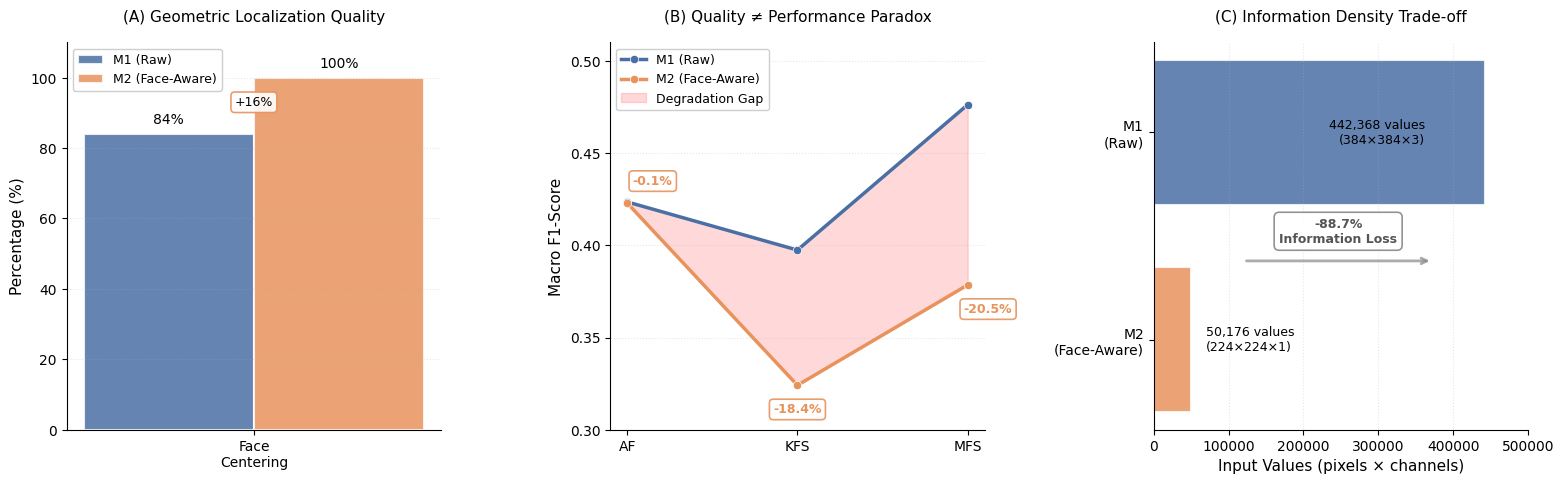


Figure saved as 'fig2_preprocessing_paradox.png'
Click below to download:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title Preprocessing Paradox Visualization

import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Professional soft colors
color_m1 = '#4A6FA5'      # Soft blue for M1 (Raw)
color_m2 = '#E8925C'      # Soft orange for M2 (Face-Aware)

# Create figure with 3 panels - increased size for better spacing
fig = plt.figure(figsize=(16, 5.2))

# Panel A: Preprocessing Quality Metrics (Bar Chart)
ax1 = plt.subplot(1, 3, 1)

metrics = ['Face\nCentering']
x_pos = np.arange(len(metrics))
width = 0.35

m1_quality = [84]
m2_quality = [100]

bars1 = ax1.bar(x_pos - width/2, m1_quality, width, label='M1 (Raw)',
                color=color_m1, alpha=0.85, edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x_pos + width/2, m2_quality, width, label='M2 (Face-Aware)',
                color=color_m2, alpha=0.85, edgecolor='white', linewidth=1.5)

# Value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{int(height)}%', ha='center', va='bottom', fontsize=10)

ax1.set_ylabel('Percentage (%)', fontsize=11, fontweight='medium')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(metrics, fontsize=10)
ax1.set_ylim(0, 110)
ax1.legend(loc='upper left', fontsize=9, framealpha=0.95)
ax1.set_title('(A) Geometric Localization Quality', fontsize=11, pad=15)
ax1.grid(axis='y', linestyle=':', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Annotation for improvement - positioned between the two bars
ax1.text(0, 92, '+16%', fontsize=9, ha='center',
         bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color_m2, lw=1.2, alpha=0.9))

# Panel B: Performance Across Phases (Line Graph)
ax2 = plt.subplot(1, 3, 2)

phases = ['AF', 'KFS', 'MFS']
x = np.arange(len(phases))
m1_performance = [0.4235, 0.3974, 0.4762]
m2_performance = [0.4229, 0.3241, 0.3785]

# Plot lines
ax2.plot(x, m1_performance, marker='o', linestyle='-', linewidth=2.5, markersize=6,
         color=color_m1, label='M1 (Raw)', markeredgewidth=0.5, markeredgecolor='white')
ax2.plot(x, m2_performance, marker='o', linestyle='-', linewidth=2.5, markersize=6,
         color=color_m2, label='M2 (Face-Aware)', markeredgewidth=0.5, markeredgecolor='white')

# Shaded area between lines
ax2.fill_between(x, m1_performance, m2_performance, alpha=0.15, color='red',
                 label='Degradation Gap')

# Performance difference annotations - positioned closer to M2 dots
differences = [(m2_performance[i] - m1_performance[i]) / m1_performance[i] * 100
               for i in range(len(phases))]

# CUSTOM POSITIONING: Adjust these offset values to move percentages
# x_offset: horizontal distance from phase position (positive = right, negative = left)
# y_offset: vertical distance from M2 dot (positive = up, negative = down)
offset_configs = [
    {'x_offset': 0.15, 'y_offset': 0.01},   # AF: slightly right and below
    {'x_offset': 0, 'y_offset': -0.015},     # KFS: centered and below
    {'x_offset': 0.12, 'y_offset': -0.015}   # MFS: slightly left and below
]

for i, diff in enumerate(differences):
    x_pos = x[i] + offset_configs[i]['x_offset']
    y_pos = m2_performance[i] + offset_configs[i]['y_offset']

    ax2.text(x_pos, y_pos, f"{diff:.1f}%",
            fontsize=9, ha='center', fontweight='semibold', color=color_m2,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color_m2, lw=1.2, alpha=0.9))

ax2.set_ylabel('Macro F1-Score', fontsize=11, fontweight='medium')
ax2.set_xticks(x)
ax2.set_xticklabels(phases, fontsize=10)
ax2.set_ylim(0.31, 0.51)
# Y-axis ticks every 0.05 for less density
ax2.set_yticks([0.30, 0.35, 0.40, 0.45, 0.50])
ax2.legend(loc='upper left', fontsize=9, framealpha=0.95)
ax2.set_title('(B) Quality ≠ Performance Paradox', fontsize=11, pad=15)
ax2.grid(axis='y', linestyle=':', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Panel C: Information Density Comparison (Horizontal Bar Chart)
ax3 = plt.subplot(1, 3, 3)

methods = ['M2\n(Face-Aware)', 'M1\n(Raw)']
values = [50176, 442368]
y_pos = np.arange(len(methods))

# Horizontal bars with gradient effect
# CUSTOM BAR SPACING: Adjust height value (larger = bars closer together)
bars = ax3.barh(y_pos, values, height=0.7,
                color=[color_m2, color_m1], alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Value labels - positioned more clearly
ax3.text(values[0] + 20000, 0, f'{values[0]:,} values\n(224×224×1)',
         va='center', fontsize=9, fontweight='medium')
ax3.text(values[1] - 80000, 1, f'{values[1]:,} values\n(384×384×3)',
         va='center', ha='right', fontsize=9, fontweight='medium')

# CUSTOM ARROW POSITIONING
# arrow_y: vertical position between bars (0.5 = centered)
# arrow_x_start: starting point (from M2 bar edge + offset)
# arrow_x_end: ending point (to M1 bar edge - offset)
# label_y_offset: how far above arrow to place text
arrow_y = 0.38
arrow_x_start = values[0] + 70000  # Adjust this to move arrow start
arrow_x_end = values[1] - 70000     # Adjust this to move arrow end
label_y_offset = 0.09               # Adjust this to move label up/down

ax3.annotate('', xy=(arrow_x_end, arrow_y), xytext=(arrow_x_start, arrow_y),
            arrowprops=dict(arrowstyle='->', lw=2, color='#888888', alpha=0.7))
ax3.text((arrow_x_start + arrow_x_end) / 2, arrow_y + label_y_offset, '-88.7%\nInformation Loss',
         ha='center', fontsize=9, fontweight='semibold', color='#555555',
         bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='#888888', lw=1.2, alpha=0.9))

ax3.set_xlabel('Input Values (pixels × channels)', fontsize=11, fontweight='medium')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(methods, fontsize=10)
ax3.set_xlim(0, 500000)
ax3.set_title('(C) Information Density Trade-off', fontsize=11, pad=15)
ax3.grid(axis='x', linestyle=':', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.tight_layout(pad=2.0, w_pad=3.0)

# Save with high quality
output_path = 'fig2_preprocessing_paradox.png'
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')

# Display in Colab
plt.show()

# Download button
print(f"\nFigure saved as '{output_path}'")
print("Click below to download:")
files.download(output_path)

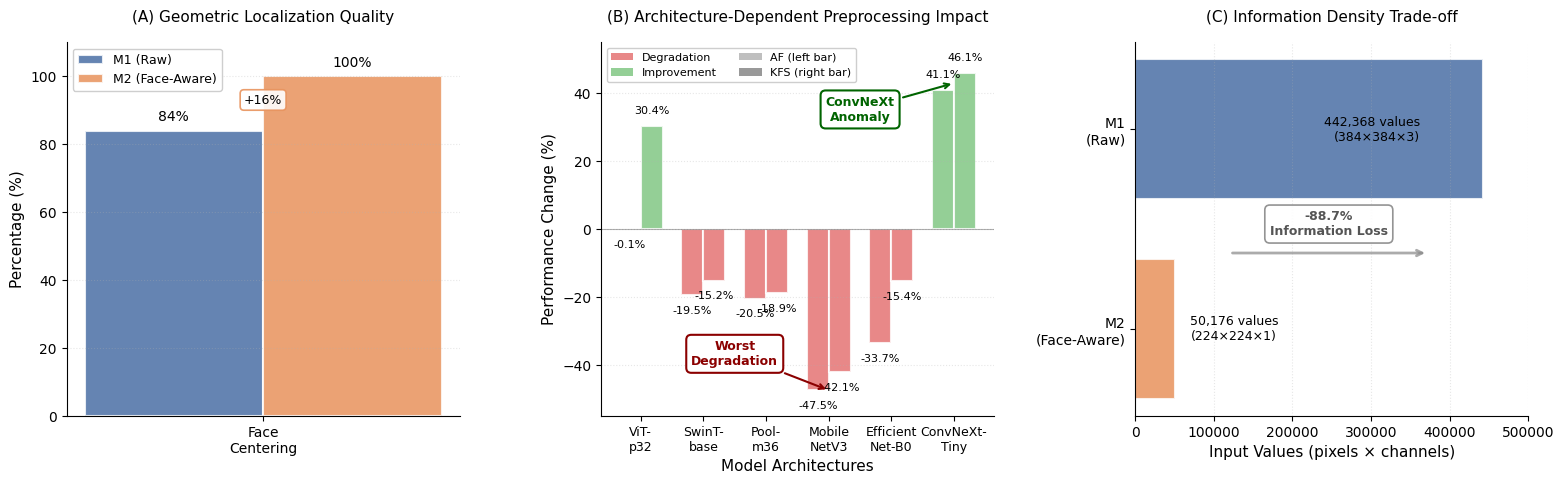


Figure saved as 'fig2_preprocessing_paradox.png'
✓ Panel A: Geometric quality comparison (unchanged)
✓ Panel B: 6-model preprocessing impact (UPDATED)
✓ Panel C: Information density trade-off (unchanged)

Key updates in Panel B:
- Added 3 CNN models (MobileNetV3, EfficientNet-B0, ConvNeXt-Tiny)
- Color-coded: Red (degradation) vs Green (improvement)
- Grouped bars: AF (left) vs KFS (right)
- Annotated: ConvNeXt anomaly & worst degradation

Click below to download:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# @title Preprocessing Paradox Visualization (Updated for 6 Models)

import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Professional soft colors
color_m1 = '#4A6FA5'      # Soft blue for M1 (Raw)
color_m2 = '#E8925C'      # Soft orange for M2 (Face-Aware)
color_degradation = '#E57373'  # Soft red for degradation
color_improvement = '#81C784'  # Soft green for improvement

# Create figure with 3 panels - increased size for better spacing
fig = plt.figure(figsize=(16, 5.2))

# ============================================================================
# Panel A: Preprocessing Quality Metrics (Bar Chart) - UNCHANGED
# ============================================================================
ax1 = plt.subplot(1, 3, 1)

metrics = ['Face\nCentering']
x_pos = np.arange(len(metrics))
width = 0.35

m1_quality = [84]
m2_quality = [100]

bars1 = ax1.bar(x_pos - width/2, m1_quality, width, label='M1 (Raw)',
                color=color_m1, alpha=0.85, edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x_pos + width/2, m2_quality, width, label='M2 (Face-Aware)',
                color=color_m2, alpha=0.85, edgecolor='white', linewidth=1.5)

# Value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{int(height)}%', ha='center', va='bottom', fontsize=10)

ax1.set_ylabel('Percentage (%)', fontsize=11, fontweight='medium')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(metrics, fontsize=10)
ax1.set_ylim(0, 110)
ax1.legend(loc='upper left', fontsize=9, framealpha=0.95)
ax1.set_title('(A) Geometric Localization Quality', fontsize=11, pad=15)
ax1.grid(axis='y', linestyle=':', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Annotation for improvement
ax1.text(0, 92, '+16%', fontsize=9, ha='center',
         bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=color_m2, lw=1.2, alpha=0.9))

# ============================================================================
# Panel B: Preprocessing Impact Across 6 Models (Grouped Bar Chart) - NEW
# ============================================================================
ax2 = plt.subplot(1, 3, 2)

# Model names and data from Table 4
models = ['ViT-\np32', 'SwinT-\nbase', 'Pool-\nm36', 'Mobile\nNetV3', 'Efficient\nNet-B0', 'ConvNeXt-\nTiny']
models_short = ['ViT', 'SwinT', 'Pool', 'Mobile', 'Efficient', 'ConvNeXt']

# Preprocessing impact data (delta % from Table 4)
delta_af = [-0.1, -19.5, -20.5, -47.5, -33.7, 41.1]
delta_kfs = [30.4, -15.2, -18.9, -42.1, -15.4, 46.1]

x = np.arange(len(models))
width = 0.35

# Create bars with color based on positive/negative values
bars_af = []
bars_kfs = []

for i in range(len(models)):
    # AF bars
    color_af = color_improvement if delta_af[i] > 0 else color_degradation
    bar_af = ax2.bar(x[i] - width/2, delta_af[i], width,
                     color=color_af, alpha=0.85, edgecolor='white', linewidth=1.5)
    bars_af.append(bar_af)

    # KFS bars
    color_kfs = color_improvement if delta_kfs[i] > 0 else color_degradation
    bar_kfs = ax2.bar(x[i] + width/2, delta_kfs[i], width,
                      color=color_kfs, alpha=0.85, edgecolor='white', linewidth=1.5)
    bars_kfs.append(bar_kfs)

    # Value labels
    # AF labels
    y_pos_af = delta_af[i] + (3 if delta_af[i] > 0 else -3)
    va_af = 'bottom' if delta_af[i] > 0 else 'top'
    ax2.text(x[i] - width/2, y_pos_af, f'{delta_af[i]:.1f}%',
             ha='center', va=va_af, fontsize=8)

    # KFS labels
    y_pos_kfs = delta_kfs[i] + (3 if delta_kfs[i] > 0 else -3)
    va_kfs = 'bottom' if delta_kfs[i] > 0 else 'top'
    ax2.text(x[i] + width/2, y_pos_kfs, f'{delta_kfs[i]:.1f}%',
             ha='center', va=va_kfs, fontsize=8)

# Horizontal line at y=0
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)

# Custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_degradation, alpha=0.85, label='Degradation'),
    Patch(facecolor=color_improvement, alpha=0.85, label='Improvement'),
    Patch(facecolor='gray', alpha=0.5, label='AF (left bar)'),
    Patch(facecolor='gray', alpha=0.8, label='KFS (right bar)')
]
ax2.legend(handles=legend_elements, loc='upper left', fontsize=8, framealpha=0.95, ncol=2)

ax2.set_ylabel('Performance Change (%)', fontsize=11, fontweight='medium')
ax2.set_xlabel('Model Architectures', fontsize=11, fontweight='medium')
ax2.set_xticks(x)
ax2.set_xticklabels(models, fontsize=9)
ax2.set_ylim(-55, 55)
ax2.set_title('(B) Architecture-Dependent Preprocessing Impact', fontsize=11, pad=15)
ax2.grid(axis='y', linestyle=':', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Highlight ConvNeXt anomaly with annotation
ax2.annotate('ConvNeXt\nAnomaly',
            xy=(5, 43), xytext=(3.5, 32),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='darkgreen'),
            fontsize=9, ha='center', fontweight='bold', color='darkgreen',
            bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='darkgreen', lw=1.5))

# Highlight worst degradation
ax2.annotate('Worst\nDegradation',
            xy=(3, -47.5), xytext=(1.5, -40),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='darkred'),
            fontsize=9, ha='center', fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='darkred', lw=1.5))

# ============================================================================
# Panel C: Information Density Comparison (Horizontal Bar Chart) - UNCHANGED
# ============================================================================
ax3 = plt.subplot(1, 3, 3)

methods = ['M2\n(Face-Aware)', 'M1\n(Raw)']
values = [50176, 442368]
y_pos = np.arange(len(methods))

bars = ax3.barh(y_pos, values, height=0.7,
                color=[color_m2, color_m1], alpha=0.85,
                edgecolor='white', linewidth=1.5)

# Value labels
ax3.text(values[0] + 20000, 0, f'{values[0]:,} values\n(224×224×1)',
         va='center', fontsize=9, fontweight='medium')
ax3.text(values[1] - 80000, 1, f'{values[1]:,} values\n(384×384×3)',
         va='center', ha='right', fontsize=9, fontweight='medium')

# Information loss arrow and label
arrow_y = 0.38
arrow_x_start = values[0] + 70000
arrow_x_end = values[1] - 70000
label_y_offset = 0.09

ax3.annotate('', xy=(arrow_x_end, arrow_y), xytext=(arrow_x_start, arrow_y),
            arrowprops=dict(arrowstyle='->', lw=2, color='#888888', alpha=0.7))
ax3.text((arrow_x_start + arrow_x_end) / 2, arrow_y + label_y_offset, '-88.7%\nInformation Loss',
         ha='center', fontsize=9, fontweight='semibold', color='#555555',
         bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='#888888', lw=1.2, alpha=0.9))

ax3.set_xlabel('Input Values (pixels × channels)', fontsize=11, fontweight='medium')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(methods, fontsize=10)
ax3.set_xlim(0, 500000)
ax3.set_title('(C) Information Density Trade-off', fontsize=11, pad=15)
ax3.grid(axis='x', linestyle=':', alpha=0.3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# ============================================================================
# Save and display
# ============================================================================
plt.tight_layout(pad=2.0, w_pad=3.0)

# Save with high quality
output_path = 'fig2_preprocessing_paradox.png'
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')

# Display in Colab
plt.show()

# Download button
print(f"\nFigure saved as '{output_path}'")
print("✓ Panel A: Geometric quality comparison (unchanged)")
print("✓ Panel B: 6-model preprocessing impact (UPDATED)")
print("✓ Panel C: Information density trade-off (unchanged)")
print("\nKey updates in Panel B:")
print("- Added 3 CNN models (MobileNetV3, EfficientNet-B0, ConvNeXt-Tiny)")
print("- Color-coded: Red (degradation) vs Green (improvement)")
print("- Grouped bars: AF (left) vs KFS (right)")
print("- Annotated: ConvNeXt anomaly & worst degradation")
print("\nClick below to download:")
files.download(output_path)

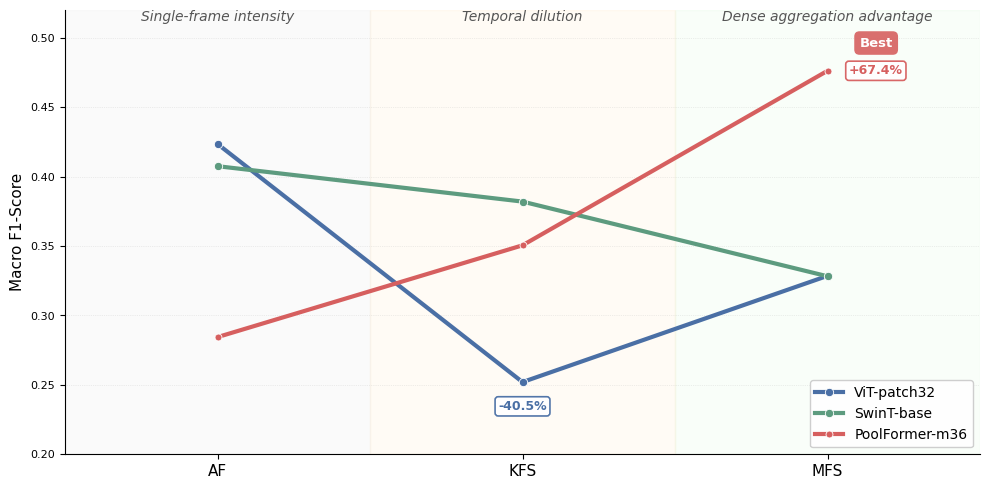


Figure saved as 'temporal_aggregation_behavior.png'
Click below to download:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title Temporal Aggregation Behavior Visualization

import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Data
phases = ['AF', 'KFS', 'MFS']
x = np.arange(len(phases))
vit = [0.4235, 0.2520, 0.3285]
swint = [0.4075, 0.3820, 0.3282]
pool = [0.2844, 0.3505, 0.4762]

# Percent changes
vit_drop_pct = (vit[1] - vit[0]) / vit[0] * 100
pool_gain_pct = (pool[2] - pool[0]) / pool[0] * 100

# Soft professional colors
color_vit = '#4A6FA5'      # Soft navy blue
color_swint = '#5D9B7F'    # Sage green
color_pool = '#D65F5F'     # Muted coral/salmon

# Create figure with larger size for better spacing
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0.20, 0.52)

# Background shading with softer colors
ax.axvspan(-0.5, 0.5, alpha=0.05, color='#B0B0B0')
ax.axvspan(0.5, 1.5, alpha=0.05, color='#FFB347')
ax.axvspan(1.5, 2.5, alpha=0.05, color='#90EE90')

# Zone labels - positioned higher to avoid overlap
ax.text(0, 0.515, "Single-frame intensity", ha='center', va='center', fontsize=10, style='italic', color='#555555')
ax.text(1, 0.515, "Temporal dilution", ha='center', va='center', fontsize=10, style='italic', color='#555555')
ax.text(2, 0.515, "Dense aggregation advantage", ha='center', va='center', fontsize=10, style='italic', color='#555555')

# Plot lines with uniform small circular markers - all solid lines
ax.plot(x, vit, marker='o', linestyle='-', linewidth=3, markersize=6,
        color=color_vit, label='ViT-patch32', markeredgewidth=0.6, markeredgecolor='white')
ax.plot(x, swint, marker='o', linestyle='-', linewidth=3, markersize=6,
        color=color_swint, label='SwinT-base', markeredgewidth=0.6, markeredgecolor='white')
ax.plot(x, pool, marker='o', linestyle='-', linewidth=3, markersize=5,
        color=color_pool, label='PoolFormer-m36', markeredgewidth=0.6, markeredgecolor='white')

# X-axis and Y-axis
ax.set_xticks(x)
ax.set_xticklabels(phases, fontsize=11, fontweight='medium')
ax.set_ylabel('Macro F1-Score', fontsize=11, fontweight='medium')

# Smaller font for y-axis values
ax.set_yticks(np.linspace(0.20, 0.50, 7))
ax.tick_params(axis='y', labelsize=8)

# Grid
ax.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.4)

# Clean percentage annotations without arrows
# ViT drop percentage directly below KFS point
ax.text(1, vit[1]-0.02, f"{vit_drop_pct:+.1f}%",
        fontsize=9, color=color_vit, fontweight='semibold', ha='center',
        bbox=dict(boxstyle='round,pad=0.25', fc='white', ec=color_vit, alpha=0.95, lw=1.2))

# PoolFormer gain percentage to the right of MFS point (same offset as KFS)
ax.text(2.07, pool[2], f"+{pool_gain_pct:.1f}%",
        fontsize=9, color=color_pool, ha='left', va='center', fontweight='semibold',
        bbox=dict(boxstyle='round,pad=0.25', fc='white', ec=color_pool, alpha=0.95, lw=1.2))

# Polished Best label above the red percentage
ax.text(2.105, pool[2]+0.02, "Best", fontsize=9.5, fontweight='bold', color='white',
        va='center', ha='left',
        bbox=dict(boxstyle='round,pad=0.4', fc=color_pool, ec=color_pool, lw=0, alpha=0.9))

# Legend moved to bottom right
ax.legend(loc='lower right', fontsize=10, frameon=True, shadow=False,
         framealpha=0.95, edgecolor='#CCCCCC')

# Remove spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Save with high quality
output_path = 'temporal_aggregation_behavior.png'
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')

# Display in Colab
plt.show()

# Download button
print(f"\nFigure saved as '{output_path}'")
print("Click below to download:")
files.download(output_path)

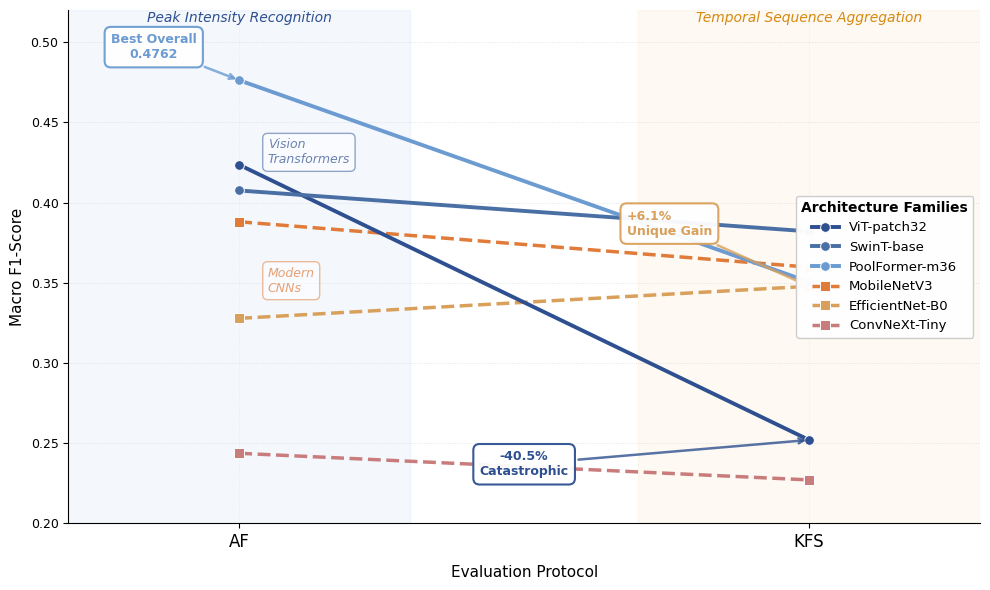


FIGURE 3: TEMPORAL AGGREGATION BEHAVIOR ANALYSIS

Vision Transformers (solid lines, circles):
  ViT-patch32:      AF=0.4235 → KFS=0.2520 (-40.5%)
  SwinT-base:       AF=0.4075 → KFS=0.3820 (-6.3%)
  PoolFormer-m36:   AF=0.4762 → KFS=0.3505 (-26.4%)

Modern CNNs (dashed lines, squares):
  MobileNetV3:      AF=0.3880 → KFS=0.3597 (-7.3%)
  EfficientNet-B0:  AF=0.3278 → KFS=0.3478 (+6.1%)
  ConvNeXt-Tiny:    AF=0.2437 → KFS=0.2271 (-6.8%)

Key Findings:
  • Worst temporal degradation: ViT-patch32 (-40.5%)
  • Best overall performance: PoolFormer-m36 AF (F1=0.4762)
  • Only temporal improvement: EfficientNet-B0 (+6.1%)
  • Most consistent: MobileNetV3 (-7.3%)

Architecture Patterns:
  • ViTs: Strong single-frame, mixed temporal behavior
  • CNNs: Generally consistent, EfficientNet uniquely improves
  • PoolFormer: Best AF despite attention-free design

Figure saved as 'fig3_temporal_behavior_expanded.png' (300 DPI)
Click below to download:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# @title Temporal Aggregation Behavior Visualization (6 Models, Two-Phase)

import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Data from Table 3 (M1 columns only)
phases = ['AF', 'KFS']
x = np.arange(len(phases))

# Vision Transformers
vit = [0.4235, 0.2520]
swint = [0.4075, 0.3820]
pool = [0.4762, 0.3505]

# CNNs
mobile = [0.3880, 0.3597]
efficient = [0.3278, 0.3478]
convnext = [0.2437, 0.2271]

# Calculate key percentage changes
vit_drop_pct = (vit[1] - vit[0]) / vit[0] * 100
efficient_gain_pct = (efficient[1] - efficient[0]) / efficient[0] * 100
pool_drop_pct = (pool[1] - pool[0]) / pool[0] * 100

# Professional color scheme
# Vision Transformers (Blue family - cooler tones)
color_vit = '#2E5090'      # Navy blue
color_swint = '#4A6FA5'    # Medium blue
color_pool = '#6B9BD1'     # Light blue

# CNNs (Orange/Warm family - warmer tones)
color_mobile = '#E07B39'   # Orange
color_efficient = '#D9A05B' # Gold/Amber
color_convnext = '#C97C7C' # Muted coral

# Create figure with optimized size
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlim(-0.3, 1.3)
ax.set_ylim(0.20, 0.52)

# Background shading with descriptive zones
ax.axvspan(-0.3, 0.3, alpha=0.06, color='#4A90E2')
ax.axvspan(0.7, 1.3, alpha=0.06, color='#F5A623')

# Zone labels - positioned at top
ax.text(0, 0.515, "Peak Intensity Recognition", ha='center', va='center',
        fontsize=10, style='italic', color='#2E5090', fontweight='medium')
ax.text(1, 0.515, "Temporal Sequence Aggregation", ha='center', va='center',
        fontsize=10, style='italic', color='#D68910', fontweight='medium')

# Plot Vision Transformers (solid lines, circular markers)
ax.plot(x, vit, marker='o', linestyle='-', linewidth=2.8, markersize=7,
        color=color_vit, label='ViT-patch32', markeredgewidth=0.7,
        markeredgecolor='white', zorder=3)
ax.plot(x, swint, marker='o', linestyle='-', linewidth=2.8, markersize=7,
        color=color_swint, label='SwinT-base', markeredgewidth=0.7,
        markeredgecolor='white', zorder=3)
ax.plot(x, pool, marker='o', linestyle='-', linewidth=2.8, markersize=7,
        color=color_pool, label='PoolFormer-m36', markeredgewidth=0.7,
        markeredgecolor='white', zorder=3)

# Plot CNNs (dashed lines, square markers for distinction)
ax.plot(x, mobile, marker='s', linestyle='--', linewidth=2.5, markersize=6.5,
        color=color_mobile, label='MobileNetV3', markeredgewidth=0.7,
        markeredgecolor='white', zorder=2)
ax.plot(x, efficient, marker='s', linestyle='--', linewidth=2.5, markersize=6.5,
        color=color_efficient, label='EfficientNet-B0', markeredgewidth=0.7,
        markeredgecolor='white', zorder=2)
ax.plot(x, convnext, marker='s', linestyle='--', linewidth=2.5, markersize=6.5,
        color=color_convnext, label='ConvNeXt-Tiny', markeredgewidth=0.7,
        markeredgecolor='white', zorder=2)

# X-axis and Y-axis
ax.set_xticks(x)
ax.set_xticklabels(phases, fontsize=12, fontweight='medium')
ax.set_xlabel('Evaluation Protocol', fontsize=11, fontweight='medium', labelpad=10)
ax.set_ylabel('Macro F1-Score', fontsize=11, fontweight='medium')

# Y-axis ticks
ax.set_yticks(np.linspace(0.20, 0.50, 7))
ax.tick_params(axis='y', labelsize=9)

# Grid
ax.grid(axis='y', linestyle=':', linewidth=0.6, alpha=0.4)
ax.grid(axis='x', linestyle=':', linewidth=0.4, alpha=0.3)

# ============================================================================
# ANNOTATIONS - Key Findings
# ============================================================================

# 1. ViT Catastrophic Drop (worst temporal degradation)
ax.annotate(f'{vit_drop_pct:.1f}%\nCatastrophic',
            xy=(1, vit[1]), xytext=(0.5, 0.23),
            arrowprops=dict(arrowstyle='->', lw=1.8, color=color_vit, alpha=0.8),
            fontsize=9, ha='center', fontweight='bold', color=color_vit,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec=color_vit, lw=1.5, alpha=0.95))

# 2. Best Overall Performance (PoolFormer AF peak)
ax.annotate('Best Overall\n0.4762',
            xy=(0, pool[0]), xytext=(-0.15, 0.49),
            arrowprops=dict(arrowstyle='->', lw=1.8, color=color_pool, alpha=0.8),
            fontsize=9, ha='center', fontweight='bold', color=color_pool,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec=color_pool, lw=1.5, alpha=0.95))

# 3. EfficientNet Unique Improvement (only model that improves with KFS)
ax.annotate(f'{efficient_gain_pct:+.1f}%\nUnique Gain',
            xy=(1, efficient[1]), xytext=(0.68, 0.38),
            arrowprops=dict(arrowstyle='->', lw=1.8, color=color_efficient, alpha=0.8),
            fontsize=9, ha='left', fontweight='bold', color=color_efficient,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec=color_efficient, lw=1.5, alpha=0.95))

# 4. Architecture Family Labels (subtle)
ax.text(0.05, 0.44, 'Vision\nTransformers', fontsize=9, color='#2E5090',
        style='italic', alpha=0.7, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='#2E5090', lw=1, alpha=0.5))

ax.text(0.05, 0.36, 'Modern\nCNNs', fontsize=9, color='#E07B39',
        style='italic', alpha=0.7, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='#E07B39', lw=1, alpha=0.5))

# ============================================================================
# Legend with architecture grouping
# ============================================================================
legend = ax.legend(loc='center right', fontsize=9.5, frameon=True, shadow=False,
                  framealpha=0.97, edgecolor='#CCCCCC', fancybox=True,
                  title='Architecture Families', title_fontsize=10)
legend.get_title().set_fontweight('bold')

# Add separator line in legend (visual trick using text)
# Note: This is approximate positioning, may need adjustment
ax.text(0.88, 0.42, '────────────', transform=ax.transAxes,
        fontsize=8, color='#CCCCCC', ha='center')

# Remove top/right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

plt.tight_layout()

# Save with high quality
output_path = 'fig3_temporal_behavior_expanded.png'
fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')

# Display in Colab
plt.show()

# Summary statistics
print("\n" + "="*70)
print("FIGURE 3: TEMPORAL AGGREGATION BEHAVIOR ANALYSIS")
print("="*70)
print("\nVision Transformers (solid lines, circles):")
print(f"  ViT-patch32:      AF={vit[0]:.4f} → KFS={vit[1]:.4f} ({vit_drop_pct:+.1f}%)")
print(f"  SwinT-base:       AF={swint[0]:.4f} → KFS={swint[1]:.4f} ({(swint[1]-swint[0])/swint[0]*100:+.1f}%)")
print(f"  PoolFormer-m36:   AF={pool[0]:.4f} → KFS={pool[1]:.4f} ({pool_drop_pct:+.1f}%)")

print("\nModern CNNs (dashed lines, squares):")
print(f"  MobileNetV3:      AF={mobile[0]:.4f} → KFS={mobile[1]:.4f} ({(mobile[1]-mobile[0])/mobile[0]*100:+.1f}%)")
print(f"  EfficientNet-B0:  AF={efficient[0]:.4f} → KFS={efficient[1]:.4f} ({efficient_gain_pct:+.1f}%)")
print(f"  ConvNeXt-Tiny:    AF={convnext[0]:.4f} → KFS={convnext[1]:.4f} ({(convnext[1]-convnext[0])/convnext[0]*100:+.1f}%)")

print("\nKey Findings:")
print(f"  • Worst temporal degradation: ViT-patch32 ({vit_drop_pct:.1f}%)")
print(f"  • Best overall performance: PoolFormer-m36 AF (F1={pool[0]:.4f})")
print(f"  • Only temporal improvement: EfficientNet-B0 ({efficient_gain_pct:+.1f}%)")
print(f"  • Most consistent: MobileNetV3 ({(mobile[1]-mobile[0])/mobile[0]*100:+.1f}%)")

print("\nArchitecture Patterns:")
print("  • ViTs: Strong single-frame, mixed temporal behavior")
print("  • CNNs: Generally consistent, EfficientNet uniquely improves")
print("  • PoolFormer: Best AF despite attention-free design")

print(f"\nFigure saved as '{output_path}' (300 DPI)")
print("Click below to download:")
print("="*70)

files.download(output_path)